<a href="https://colab.research.google.com/github/Srijavali/Ai-ml-projects-labs-submission/blob/main/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [ ]:
breast_data = load_breast_cancer().data
print("Features:", breast_data.shape)  ### 569 rows and 30 columns expected
#rows represent the number of data points and the coloumns represent the no.of features each data point had
breast_labels = np.reshape(load_breast_cancer().target, (569,1))
print("Target:", breast_labels.shape) ### 569 rows and 1 target column expected

Features: (569, 30)
Target: (569, 1)


In [ ]:
## Creating a Pandas dataframe for the dataset with the last column as the target variable

final_breast_data = np.concatenate([breast_data, breast_labels],axis=1)#breast labels indicates wheather it is benign or malignant like non-cancerous or cancerous
breast_dataset = pd.DataFrame(final_breast_data)

features = load_breast_cancer().feature_names
features_labels = np.append(features,'label') #in labels we can observe 0 and 1 and here 1 defines about the cancer patient
breast_dataset.columns = features_labels
breast_dataset.head(20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0.0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0.0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0.0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,0.0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0.0


In [ ]:
# Dividing the values into the features and labels for convenience later on

X = breast_dataset.iloc[:,:30].values #includes all rows and 30 coloumns like all the features
y = breast_dataset.iloc[:,30].values #includes all the rows and 30th coloumn like the label one
#.values property converts the whole dataset into a Numpy array.
print(np.shape(X), np.shape(y)) #Gives the shape of those arrays

(569, 30) (569,)


Step By Step Computation Of PCA
The below steps need to be followed to perform dimensionality reduction using PCA:

1. Standardization of the data

2. Computing the covariance matrix

3. Calculating the eigenvectors and eigenvalues

4. Computing the Principal Components

5. Reducing the dimensions of the data set




In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

print(np.std(X_std))
print(np.mean(X_std)) # practically we can consider this as zero as it is a tiny negative value

1.0
-6.118909323768877e-16


In [ ]:
X_std_df = pd.DataFrame(X_std)
X_std_df.columns = features
X_std_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
mean_vec = np.mean(X_std, axis=0) ## Computing feature wise means

# Covariance matrix = i/(N-1) * X^T * X
# where X is the normalized feature matrix and N is the number of data points (rows)

cov_mat = 1/ (X_std.shape[0]-1) * (X_std - mean_vec).T.dot(X_std - mean_vec) #cov(a)=(1/N-1)*(X.T)*X
#X_std - mean_vec=This subtracts the mean of each feature from every value in that feature (this centers the data around zero).
print("Covariance matrix first 5 rows and columns:")
print(cov_mat[0:5, 0:5])

Covariance matrix first 5 rows and columns:
[[ 1.00176056  0.32435193  0.99961207  0.98909547  0.17088151]
 [ 0.32435193  1.00176056  0.33011322  0.32165099 -0.02342969]
 [ 0.99961207  0.33011322  1.00176056  0.98824361  0.20764309]
 [ 0.98909547  0.32165099  0.98824361  1.00176056  0.17734005]
 [ 0.17088151 -0.02342969  0.20764309  0.17734005  1.00176056]]


In [ ]:
cov_mat.shape

(30, 30)

In [ ]:
cov_mat_numpy = np.cov(X_std.T)
#From numpy module we can directly use np.cov(x.T) in order to get covariance matrix
print("Covariance matrix first 5 rows and columns:")
print(cov_mat_numpy[0:5, 0:5])

Covariance matrix first 5 rows and columns:
[[ 1.00176056  0.32435193  0.99961207  0.98909547  0.17088151]
 [ 0.32435193  1.00176056  0.33011322  0.32165099 -0.02342969]
 [ 0.99961207  0.33011322  1.00176056  0.98824361  0.20764309]
 [ 0.98909547  0.32165099  0.98824361  1.00176056  0.17734005]
 [ 0.17088151 -0.02342969  0.20764309  0.17734005  1.00176056]]


In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print(eig_vals.shape, eig_vecs.shape) #having a 30 eigen values and it indicates a 1D array
print("\n\n")
print(eig_vals)
print("\n\n")
print(eig_vecs)

(30,) (30, 30)



[1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 1.33279057e-04
 7.50121413e-04 1.59213600e-03 6.91261258e-03 8.19203712e-03
 1.55085271e-02 1.80867940e-02 2.43836914e-02 2.74877113e-02
 3.12142606e-02 3.00256631e-02]



[[ 2.18902444e-01 -2.33857132e-01 -8.53124284e-03  4.14089623e-02
  -3.77863538e-02  1.87407904e-02  1.24088340e-01  7.45229622e-03
  -2.23109764e-01  9.54864432e-02  4.14714866e-02  5.10674568e-02
   1.19672116e-02 -5.95061348e-02 -5.11187749e-02  1.50583883e-01
  -2.02924255e-01 -1.46712338e-01  2.25384659e-01  7.02414091e-01
  -2.11460455e-01  2.11194013e-01 -1.31526670e-01  1.29476396e-01
   1.92264989e-02 -1.82579441e-01  9.85526942e-02 -7.29289034e-02
  -4.96986642e-02  6.85700057e-02]
 [ 1.03724578e-01 -5.97

Explained variance:
[44.27202560752635, 18.971182044033085, 9.393163257431393, 6.602134915470151, 5.495768492346255, 4.0245220398833546, 2.250733712982508, 1.5887238000213262, 1.3896493745591088, 1.1689781894131472, 0.9797189875980173, 0.870537900737884, 0.8045249871967302, 0.5233657454926353, 0.31378321676273985, 0.26620933651523176, 0.19799679253242683, 0.17539594502263636, 0.1649253059225157, 0.10386467483387138, 0.0999096463700257, 0.09146467510543423, 0.08113612588991044, 0.06018335666716721, 0.05160423791652017, 0.02725879954774855, 0.0230015462505957, 0.005297792903809204, 0.0024960103246895395, 0.00044348274273613787]
Cumulative explained variance:
[ 44.27202561  63.24320765  72.63637091  79.23850582  84.73427432
  88.75879636  91.00953007  92.59825387  93.98790324  95.15688143
  96.13660042  97.00713832  97.81166331  98.33502905  98.64881227
  98.91502161  99.1130184   99.28841435  99.45333965  99.55720433
  99.65711397  99.74857865  99.82971477  99.88989813  99.94150237
  99.

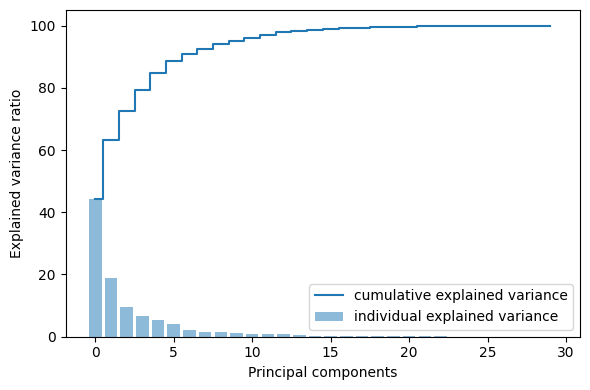

In [ ]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print("Explained variance:")
print(var_exp)

cum_var_exp = np.cumsum(var_exp)
print("Cumulative explained variance:")
print(cum_var_exp)

# Plotting the variance explained by each component and the cumulative variance explained

plt.figure(figsize=(6 , 4))
plt.bar(range(30), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(30), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(30,1),
                      eig_pairs[1][1].reshape(30,1),
                      eig_pairs[2][1].reshape(30,1)))

Y = X_std.dot(matrix_w)
# we are stacking these three eigen vectors side by side in order to frame a matrix that is matrix_w these are the vectors of principal components
#we had choosen before that is the first three in the graph as they show maximum variance of the data set
print(Y)#(30,3) shape

[[ 9.19283683  1.94858307 -1.12316616]
 [ 2.3878018  -3.76817174 -0.52929269]
 [ 5.73389628 -1.0751738  -0.55174759]
 ...
 [ 1.25617928 -1.90229671  0.56273053]
 [10.37479406  1.67201011 -1.87702933]
 [-5.4752433  -0.67063679  1.49044308]]


In [ ]:
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X_std)

print(Y_sklearn)

[[ 9.19283683  1.94858307 -1.12316616]
 [ 2.3878018  -3.76817174 -0.52929269]
 [ 5.73389628 -1.0751738  -0.55174759]
 ...
 [ 1.25617928 -1.90229671  0.56273053]
 [10.37479406  1.67201011 -1.87702933]
 [-5.4752433  -0.67063679  1.49044308]]


In [ ]:
final_df = pd.DataFrame(columns=["PC1", "PC2", "PC3", "Label"])

for i in range(len(Y)):

    dicti = dict()

    dicti["PC1"] = Y[i, 0]
    dicti["PC2"] = Y[i, 1]
    dicti["PC3"] = Y[i, 2]
    if (int(breast_labels[i][0]) == 0):
      dicti["Label"] = "Benign"
    else:
      dicti["Label"] = "Malignant"

    final_df = pd.concat([final_df, pd.DataFrame([dicti])], ignore_index=True)


final_df.head()

<ipython-input-38-a9487bf07452>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([final_df, pd.DataFrame([dicti])], ignore_index=True)


,PC1,PC2,PC3,Label
0,9.192837,1.948583,-1.123166,Benign
1,2.387802,-3.768172,-0.529293,Benign
2,5.733896,-1.075174,-0.551748,Benign
3,7.122953,10.275589,-3.232790,Benign
4,3.935302,-1.948072,1.389767,Benign


from matplotlib import pyplot as plt
_df_16['PC1'].plot(kind='hist', bins=20, title='PC1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['PC2'].plot(kind='hist', bins=20, title='PC2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['PC3'].plot(kind='hist', bins=20, title='PC3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='PC1', y='PC2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='PC2', y='PC3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['PC1'].plot(kind='line', figsize=(8, 4), title='PC1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['PC2'].plot(kind='line', figsize=(8, 4), title='PC2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['PC3'].plot(kind='line', figsize=(8, 4), title='PC3')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
for_x = final_df.PC1.tolist()
for_y = final_df.PC2.tolist()
for_label = final_df.Label.tolist()
for_hover = final_df.Label.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_label,
                 title="Principal Component Axis",
                 color_discrete_map={"Benign": "aqua", "Malignant": "yellow"})

fig.update_layout(
    xaxis=dict(title = 'PC1', showgrid=True, ticks='inside',zeroline=True,  mirror=True, showline=True, linecolor='white'),
    yaxis=dict(title = 'PC2', showgrid=True, ticks='outside',zeroline=True,  mirror=True, showline=True, linecolor='white'),
    plot_bgcolor='#555555',
    font=dict(
        family="Times New Roman",
        size=20,
        color="black"))
fig.update_traces(marker=dict(size=10,))

fig.show(renderer = "colab")

 from the above plot we can say that the first 2 principal components were able to differentiate the benign and malignant tumours in our breast cancer dataset. This motivates the use of the second application of PCA, which was to reduce the number of features in the dataset so that the machine learning algorithm **can be trained without overfitting.**

In [ ]:
fig = px.scatter_3d(final_df, x='PC1', y='PC2', z='PC3', color='Label', title="Principal Component Axis")
fig.update_traces(marker=dict(size=6,))

fig.show(renderer = "colab")

How many components do you need to retain 90% of the variance in the data?

```
# Answer
print(var_exp[0])
print(var_exp[1])
print(var_exp[2])
print(var_exp[3])
sum(var_exp[0:7])
```
if we consider upto 7 first coloumns in the graph or plot as the principal componets as these contribute upto 90% of the variance in the given data set and the remaining 23 did'nt contribute much in the data set so if we consider these then we can retain upto 90% of the variance in the data.


In [ ]:
print(var_exp[0])
print(var_exp[1])
print(var_exp[2])
print(var_exp[3])
sum(var_exp[0:7])

44.27202560752635
18.971182044033085
9.393163257431393
6.602134915470151


91.00953006967309

Find one other use case that makes use of PCA and summarize how it is applied to the problem domain.

```
# Answer
```
Use Case: **Facial Recognition**
an image have tons of pixels so it is hyper dimensional which is tough to imagine so inorder to reduce the high no.of dimensions we use pca
**Dimensionality Reduction** it filters the features which contribute more in the variance of the data by including these as the principal components.
**Extracting "Eigenfaces"** the model can find the or recognise the images more effeciently as the complexity also decreases and models try to find the patterns rather than getting used to them this also decreases the over fitting
**Recognizing Faces** When a new face is introduced, the system compares it against the database of PCA-compressed faces (using the eigenfaces). the system quickly identifies or verifies the person based on how similar their principal components are to those in the database.


```
# 2
```


Use Case: **Anomaly Detection in Network Security**
In cybersecurity, identifying unusual activity (like cyber-attacks or system breaches) in massive amounts of network traffic is crucial. Network data often has hundreds of variables (e.g., IP addresses, ports, protocols, packet sizes), making it high-dimensional.
Dimensionality Reductionreduces the network data to a smaller set of principal components that capture the most important patterns in "normal" traffic. **Establishing a Baseline for Normal Behavior** and detecting anomaly.

```
# 3
```
Use Case: **Customer Segmentation in Marketing**
In marketing, businesses want to target specific groups of customers with tailored strategies. However, customer data can be complex, with many variables like age, purchase history, location, browsing behavior, etc. Analyzing all these dimensions at once can be overwhelming and inefficient.


*   Dimensionality Reduction
*   Identifying Key Factors or principal components
*   Clustering Customers
*   improving their customisations and strategies for better bussiness

```
# 4
```
Use Case: **Genetic Data Analysis**
 scientists analyze large datasets of genetic information, such as DNA sequences or gene expression levels. These datasets can contain thousands or even millions of variables (e.g., gene activity levels across different conditions or samples), making it difficult to extract meaningful insights without reducing the complexity.

*   Dimensionality Reduction
*   Identifying Key Genes or Patterns or correlations between genes
*   Clustering Samples or Patients based on genetic similarities
*   Visualization in 2d or 3d in order to see the outliers and clusters clearly






